In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('CreditScoring.csv')

In [4]:
df.columns = df.columns.str.lower()

In [5]:
status_cat = ["unknown", "ok", "default"]
home_cat = ["unknown", "rent", "owner", "priv", "ignore", "parents", "other"]
marital_cat = ["unknown", "single", "married", "widow", "separated", "divorced"]
records_cat = ["unknown", "no_rec", "yes_rec"]
job_cat = ["unkonwn", "fixed", "partime", "freelance", "others"]

df.status = df.status.map(lambda x: status_cat[x])
df.home = df.home.map(lambda x: home_cat[x])
df.marital = df.marital.map(lambda x: marital_cat[x])
df.records = df.records.map(lambda x: records_cat[x])
df.job = df.job.map(lambda x: job_cat[x])

In [5]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no_rec,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no_rec,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes_rec,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no_rec,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no_rec,fixed,46,107,0,0,310,910


In [6]:
# for col in df.columns:
#     print('-' * 40 + col + '-' * 40 , end=' - ')
#     display(df[col].value_counts().head(10))

In [7]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [6]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [9]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [7]:
df = df[df.status != 'unknown'].reset_index(drop=True)

In [8]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

/home/vii/anaconda3/envs/ml/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [10]:
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [11]:
del df_train['status']
del df_val['status']
del df_test['status']

In [15]:
df_train.head()

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no_rec,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes_rec,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no_rec,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no_rec,partime,35,72.0,0.0,0.0,1078,1079
4,5,owner,36,46,married,no_rec,freelance,60,100.0,4000.0,0.0,1100,1897


__Decision Trees__

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [13]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

In [14]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [19]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [21]:
y_pred = dt.predict_proba(X_val)[:, 1]

In [22]:
roc_auc_score(y_val, y_pred)

0.6610308541812986

In [23]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

In [24]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7389079944782155

In [25]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

0.7761016984958594

In [26]:
from sklearn.tree import export_text

In [27]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- records=yes_rec <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- class: 0
|   |   |--- income >  74.50
|   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- assets <= 8750.00
|   |   |   |--- class: 1
|   |   |--- assets >  8750.00
|   |   |   |--- class: 0
|--- records=yes_rec >  0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- income <= 103.50
|   |   |   |--- class: 1
|   |   |--- income >  103.50
|   |   |   |--- class: 0



In [28]:
from sklearn.tree import export_graphviz
export_graphviz(dt,out_file='tree.dot', feature_names=list(dv.get_feature_names_out()))

In [29]:
!dot -Tpng tree.dot -o tree.png

__algo__

In [31]:
for d in[1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    print('%4s -> %.3f' % (d, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.766
   6 -> 0.761
  10 -> 0.681
  15 -> 0.668
  20 -> 0.654
None -> 0.665


In [46]:
scores = []

for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    for s in [1, 2, 5, 10, 15, 20, 50, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, s, auc))

In [47]:
columns = ['max_depth', 'min_sample_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.sort_values(by='auc', ascending=False)

,max_depth,min_sample_leaf,auc
64,10.0,15,0.789924
94,NaN,15,0.788713
84,20.0,15,0.788059
74,15.0,15,0.786594
54,6.0,15,0.785319
...,...,...,...
5,1.0,20,0.605864
4,1.0,15,0.605864
3,1.0,10,0.605864
2,1.0,5,0.605864


In [48]:
df_scores_pivot = df_scores.pivot(index='min_sample_leaf',
                         columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc                                                   \
max_depth          NaN   1.0    2.0    3.0    4.0    5.0    6.0    10.0   
min_sample_leaf                                                           
1                0.656  0.606  0.669  0.739  0.761  0.766  0.759  0.694   
2                0.686  0.606  0.669  0.739  0.761  0.766  0.764  0.711   
5                0.723  0.606  0.669  0.739  0.761  0.768  0.762  0.729   
10               0.761  0.606  0.669  0.739  0.761  0.762  0.778  0.764   
15               0.789  0.606  0.669  0.738  0.764  0.772  0.785  0.790   
20               0.781  0.606  0.669  0.736  0.761  0.774  0.774  0.785   
50               0.778  0.606  0.669  0.736  0.753  0.767  0.770  0.778   
100              0.779  0.606  0.669  0.736  0.756  0.763  0.776  0.779   
200              0.768  0.606  0.669  0.729  0.747  0.759  0.768  0.768   
500              0.680  0.620  0.680  0.680  0.680  0.680  0.680  0.680   

                               
max_depth         15.0   20.0  
min_sample_leaf                
1                0.662  0.654  
2                0.679  0.699  
5                0.720  0.717  
10               0.760  0.765  
15               0.787  0.788  
20               0.781  0.782  
50               0.778  0.778  
100              0.779  0.779  
200              0.768  0.768  
500              0.680  0.680

<AxesSubplot:xlabel='None-max_depth', ylabel='min_sample_leaf'>

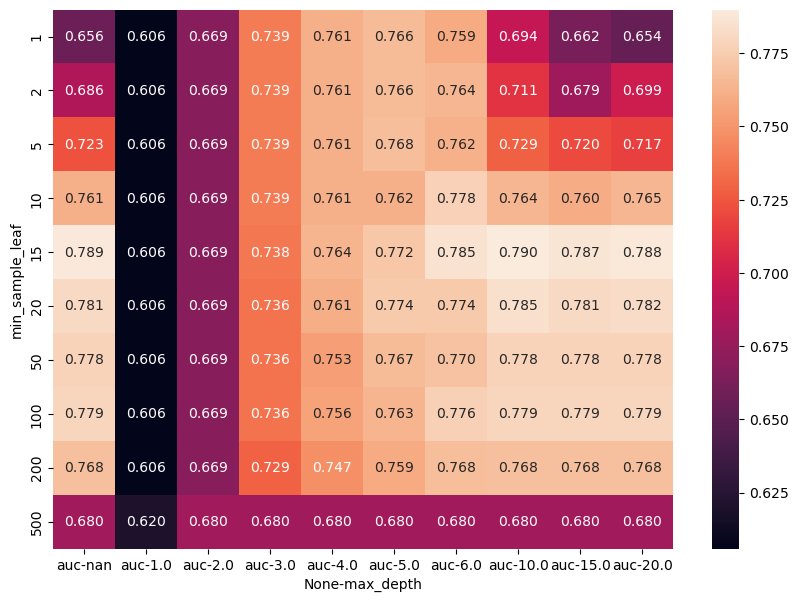

In [53]:
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f')

In [54]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

__Ensembles and random forest__

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [68]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7744726453706618

In [74]:
scores = []
for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((n, auc))

In [76]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

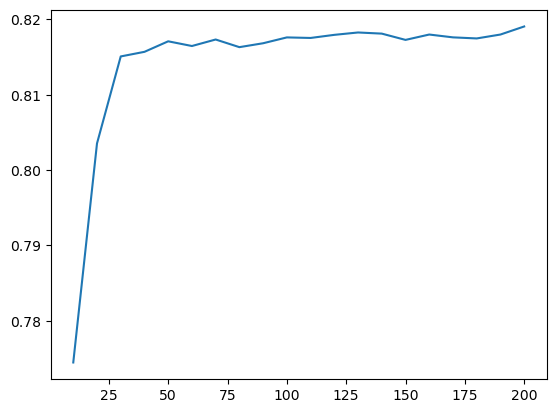

In [77]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [78]:

scores = []
for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, n, auc))

In [79]:
df_scores = pd.DataFrame(scores, columns=['max_depth', 'n_estimators', 'auc'])

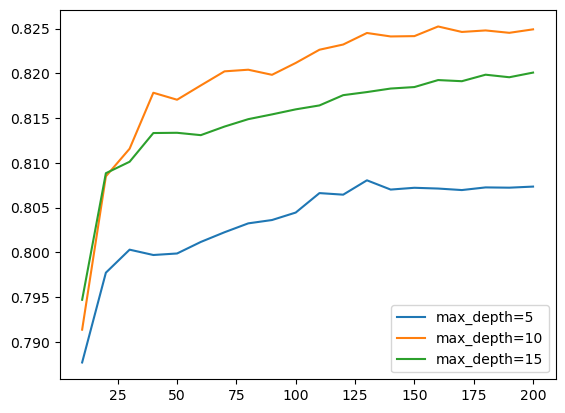

In [84]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label='max_depth=%s'%d)

plt.legend()

In [85]:
max_depth = 10


In [87]:

scores = []
for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((s, n, auc))

In [89]:
df_scores = pd.DataFrame(scores, columns=['min_samples_leaf', 'n_estimators', 'auc'])

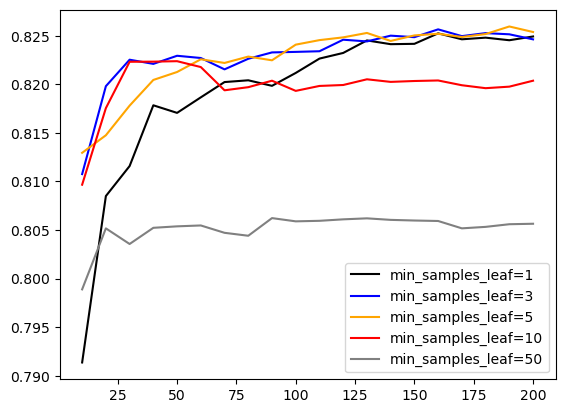

In [91]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
min_samples_leaf_values = [1, 3, 5, 10, 50]
for s, col in zip(min_samples_leaf_values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset.n_estimators, df_subset.auc,
                    color=col,
                     label='min_samples_leaf=%s'%s)

plt.legend()

In [92]:
min_samples_leaf = 3

In [93]:
rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=min_samples_leaf,
                                    random_state=1)
rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)

In [94]:
auc

0.8246258264512848

__gradient boosting via xgboost__

In [96]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 1.1 MB/s eta 0:00:0000:0100:01


In [15]:
import xgboost as xgb

/home/vii/anaconda3/envs/ml/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [99]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [111]:
watchlist = [(dtrain, 'train'),( dval, 'val')]

In [116]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric':'auc',
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain,
                    evals=watchlist,
                    verbose_eval=5,
                    num_boost_round=200)

In [122]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [124]:
df_score = parse_xgb_output(output)

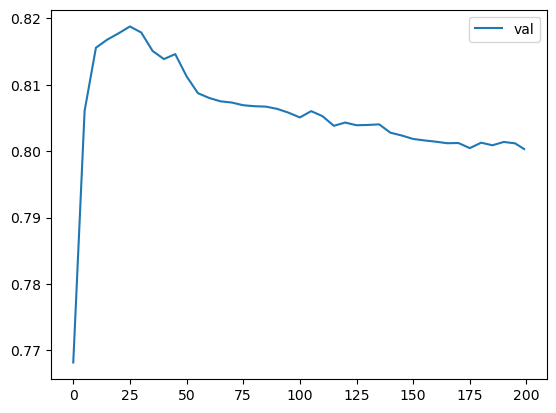

In [126]:
# plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

In [127]:
df_score.sort_values(by='val_auc', ascending=False).head()

,num_iter,train_auc,val_auc
5,25,0.98174,0.81878
6,30,0.98772,0.81787
4,20,0.97316,0.81775
3,15,0.96558,0.81680
2,10,0.95002,0.81558


__XGBoost parameters tuning__

In [166]:
scores = {}

In [174]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric':'auc',
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain,
                    evals=watchlist,
                    verbose_eval=5,
                    num_boost_round=200)

In [175]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=20'

In [176]:
scores.keys()

dict_keys(['min_child_weight=1', 'min_child_weight=10', 'min_child_weight=20'])

(0.82, 0.84)

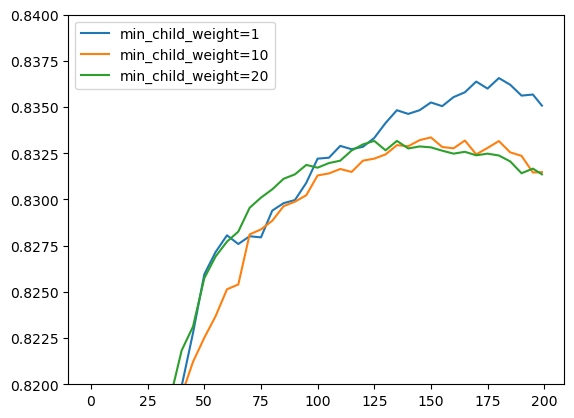

In [178]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()
plt.ylim(0.82, 0.84)

In [179]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric':'auc',
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain,
                    num_boost_round=175)

In [180]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8360387251459157

In [181]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [184]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7852498123077667

In [182]:
rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=10,
                                    min_samples_leaf=3,
                                    random_state=1)
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [185]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8246258264512848

__Final model__

In [16]:
df_full_train = df_full_train.reset_index(drop=True)

In [17]:
y_full_train = (df_full_train.status == 'default').astype('int').values

In [18]:
del df_full_train['status']

In [19]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [20]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train, 
                            feature_names=list(dv.get_feature_names_out()))
dtest = xgb.DMatrix(X_test, feature_names=list(dv.get_feature_names_out()))

In [21]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric':'auc',
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain,
                    num_boost_round=175)

In [22]:
y_pred = model.predict(dtest)
roc_auc_score(y_test, y_pred)

0.8322662626460096

In [23]:
import bentoml
bentoml.xgboost.save_model("credit_risk_model", model)

Model(tag="credit_risk_model:qzm45nsr6c4m6tzh", path="/home/vii/bentoml/models/credit_risk_model/qzm45nsr6c4m6tzh/")